Данный датасет скачан с сайта https://data.mos.ru/opendata/ из открытого источника

**Цель исследования - провести краткий анализ датасета и возможно получить какие-то инсайды**

# Загрузка и разбор набора данных

Загружаем библиотеки

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('data-5283-2021-06-17.csv',sep=';',encoding='ANSI')
df = df[df.columns[:-1]]

In [5]:
df.head()

,ID,AdmArea,Year,global_id,Month,Calls
0,1,Центральный административный округ,2015,37153160,Январь,408
1,2,Северный административный округ,2015,37153161,Январь,408
2,3,Северо-Восточный административный округ,2015,37153162,Январь,445
3,4,Восточный административный округ,2015,37153163,Январь,619
4,5,Юго-Восточный административный округ,2015,37153164,Январь,541


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         847 non-null    int64 
 1   AdmArea    847 non-null    object
 2   Year       847 non-null    int64 
 3   global_id  847 non-null    int64 
 4   Month      847 non-null    object
 5   Calls      847 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 39.8+ KB


Исправим некорректно заполненные месяца

In [7]:
df['Month'].replace('август','Август',inplace=True)
df['Month'].replace('сентябрь','Сентябрь',inplace=True)
df['Month'].replace('февраль','Февраль',inplace=True)
df['Month'].replace('Сентября','Сентябрь',inplace=True)
df['Month'].replace('март','Март',inplace=True)

In [8]:
mouth_list =list(df['Month'].unique())

In [9]:
mouth_list

['Январь',
 'Февраль',
 'Март',
 'Апрель',
 'Май',
 'Июнь',
 'Июль',
 'Август',
 'Сентябрь',
 'Октябрь',
 'Ноябрь',
 'Декабрь']

# Краткий анализ на основе существующих данных 

In [10]:
df_mouth = df.groupby(by='Month',sort=False)['Calls'].sum().reset_index()

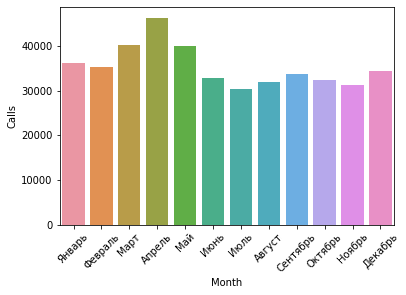

In [11]:
sns.barplot(x = 'Month',y = 'Calls',data=df_mouth)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.show()

Как мы видим в целом наибольшее количество вызовов приходится на весенний период

Расмотрим теперь распределение по округам

Уберем из названия административный округ

In [12]:
df['AdmArea'] = df['AdmArea'].apply(lambda x:x.replace('  ',' '))
df['AdmArea'] = df['AdmArea'].apply(lambda x:x.replace(' административные округа',''))
df['AdmArea'] = df['AdmArea'].apply(lambda x:x.replace(' административный округа',''))
df['AdmArea'] = df['AdmArea'].apply(lambda x:x.replace(' административный округ',''))
df['AdmArea'] = df['AdmArea'].apply(lambda x:x.replace(' административные округ а',''))
df['AdmArea'] = df['AdmArea'].apply(lambda x:x.strip())
df['AdmArea'] = df['AdmArea'].apply(lambda x:x.replace(' административные округа',''))

Мы видим, что названия не везде корректно занесены, поэтому скорректируем столбец, как мы это делали с месяцами. Мы знаем, что в Москве 12 административных округов. Отредактируем исходя из этого.

Причем мы видим из Датасета, что Троицкий и Новомосковский административный округа объединены. Следовательно по итогу у нас должно получиться 11 округов

In [13]:
dict_error = {
    'ЮгоЗападный':'Юго-Западный',
    'Юго-западный':'Юго-Западный',
    'Юго=Восточный':'Юго-Восточный',
    'Юго-Востосный':'Юго-Восточный',
    'Юго-Восточнный':'Юго-Восточный',
    'Запдный':'Западный',
    'Северо-Закпадный':'Северо-Западный',
    'Северо-Заподный':'Северо-Западный',
    'Севеврный':'Северный',
    'Северо-Востосный':'Северо-Восточный',
    'Троицкий и новомосковский':'Троицкий и Новомосковский',
    'Северно-Западный':'Северо-Западный'
}

def error_replace(text_area):
    if text_area in dict_error.keys():
        return dict_error[text_area]
    return text_area

In [14]:
df['AdmArea'] = df['AdmArea'].apply(lambda x:error_replace(x))

In [15]:
list_area = df['AdmArea'].unique()

In [16]:
print(list_area)
print(f'Длина списка составляет {len(list_area)}')

['Центральный' 'Северный' 'Северо-Восточный' 'Восточный' 'Юго-Восточный'
 'Южный' 'Юго-Западный' 'Западный' 'Северо-Западный' 'Зеленоградский'
 'Троицкий и Новомосковский']
Длина списка составляет 11


Теперь можем получить статистику по Административным районам

In [17]:
df_area = df.groupby(by='AdmArea')['Calls'].sum().reset_index()

In [18]:
df_area.sort_values(by='Calls',ascending=False).reset_index(drop=True)

,AdmArea,Calls
0,Южный,53429
1,Восточный,51101
2,Юго-Восточный,47806
3,Северо-Восточный,45015
4,Западный,43741
5,Юго-Западный,38029
6,Северный,36676
7,Центральный,35209
8,Северо-Западный,32260
9,Троицкий и Новомосковский,29609


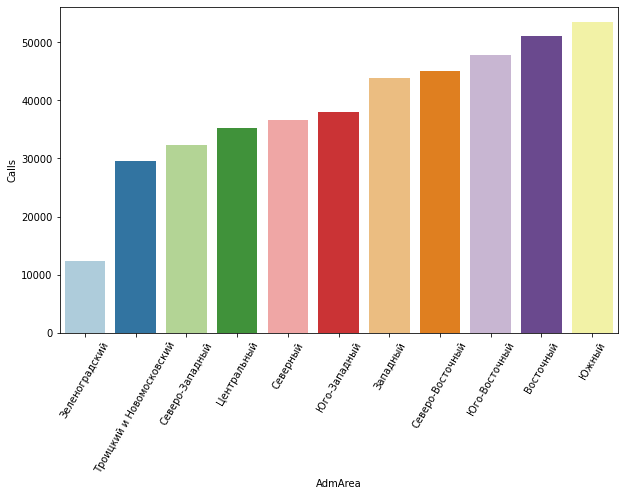

In [19]:
sns.barplot(x = 'AdmArea',y = 'Calls',data=df_area.sort_values(by='Calls'),palette='Paired')

locs, labels = plt.xticks()
plt.setp(labels, rotation=60)

fig=plt.gcf()
fig.set_size_inches(10,6)

plt.show()

Мы видим, что Зеленоградский район значительно уступает по вызовам, однако и площадь его значительно меньше

Стоит отметить, что лидерами по вызовам является Восточная часть Москвы

# Статистика в динамике

Теперь рассмотрим общую динамику по вызовам пожарных

In [20]:
df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [21]:
df_year_total = df.groupby(by = 'Year')['Calls'].sum()

Среднее количество вызовов в месяц

In [22]:
 for k,v in df_year_total.items():
     if k == 2021:
         print(f'Среднее в месяц за {k} год равно {round(v/5,2)}')
     else:
         print(f'Среднее в месяц за {k} год равно {round(v/12,0)}')

Среднее в месяц за 2015 год равно 4698.0
Среднее в месяц за 2016 год равно 4652.0
Среднее в месяц за 2017 год равно 5043.0
Среднее в месяц за 2018 год равно 6590.0
Среднее в месяц за 2019 год равно 6303.0
Среднее в месяц за 2020 год равно 5562.0
Среднее в месяц за 2021 год равно 6213.0


Количество вызовов за каждый год

In [23]:
df_year_total.reset_index()

,Year,Calls
0,2015,56373
1,2016,55820
2,2017,60516
3,2018,79077
4,2019,75636
5,2020,66748
6,2021,31065


<AxesSubplot:xlabel='Year'>

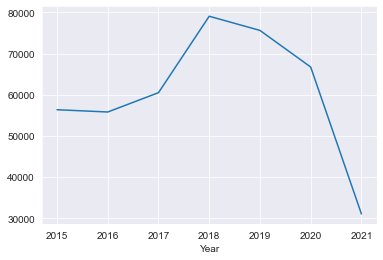

In [24]:
sns.set_style("darkgrid")

df_year_total.plot()

**Мы видим, что в 2018 году было значительное увеличение вызовов пожарных, но затем постепенно тенденция пошла на спад**

Попробуем разобраться поподробнее. Для этого сделаем статистику по месяцам и годам

In [25]:
dict_month = {}
for k,v in enumerate(mouth_list,start=1):
    dict_month[v] = str(k)
    
    
df['Month_num'] = df['Month'].apply(lambda x: dict_month[x])

In [26]:
dict_month

{'Январь': '1',
 'Февраль': '2',
 'Март': '3',
 'Апрель': '4',
 'Май': '5',
 'Июнь': '6',
 'Июль': '7',
 'Август': '8',
 'Сентябрь': '9',
 'Октябрь': '10',
 'Ноябрь': '11',
 'Декабрь': '12'}

In [27]:
df['Date'] = df['Year'].apply(str)+'.'+df['Month_num']
df['Date'] = pd.to_datetime(df['Date'])

<AxesSubplot:xlabel='Date'>

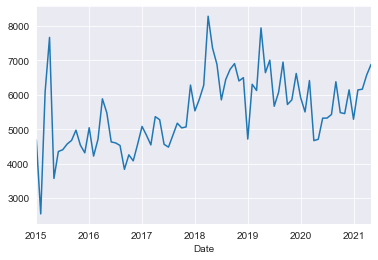

In [28]:
df_date_total = df.groupby(by = 'Date')['Calls'].sum()

df_date_total.plot()

Мы видим, что определенно весна играет большой вес в общем росте звонков, но тем не менее не наблюдается каких-то либо выбросов(кроме 2015 года)

In [29]:
df[:10]

,ID,AdmArea,Year,global_id,Month,Calls,Month_num,Date
0,1,Центральный,2015,37153160,Январь,408,1,2015-01-01
1,2,Северный,2015,37153161,Январь,408,1,2015-01-01
2,3,Северо-Восточный,2015,37153162,Январь,445,1,2015-01-01
3,4,Восточный,2015,37153163,Январь,619,1,2015-01-01
4,5,Юго-Восточный,2015,37153164,Январь,541,1,2015-01-01
5,6,Южный,2015,37153165,Январь,549,1,2015-01-01
6,7,Юго-Западный,2015,37153166,Январь,461,1,2015-01-01
7,8,Западный,2015,37153168,Январь,479,1,2015-01-01
8,9,Северо-Западный,2015,37153169,Январь,379,1,2015-01-01
9,10,Зеленоградский,2015,37153170,Январь,128,1,2015-01-01


Рассмотрим теперь статистику в разрезе административных округов

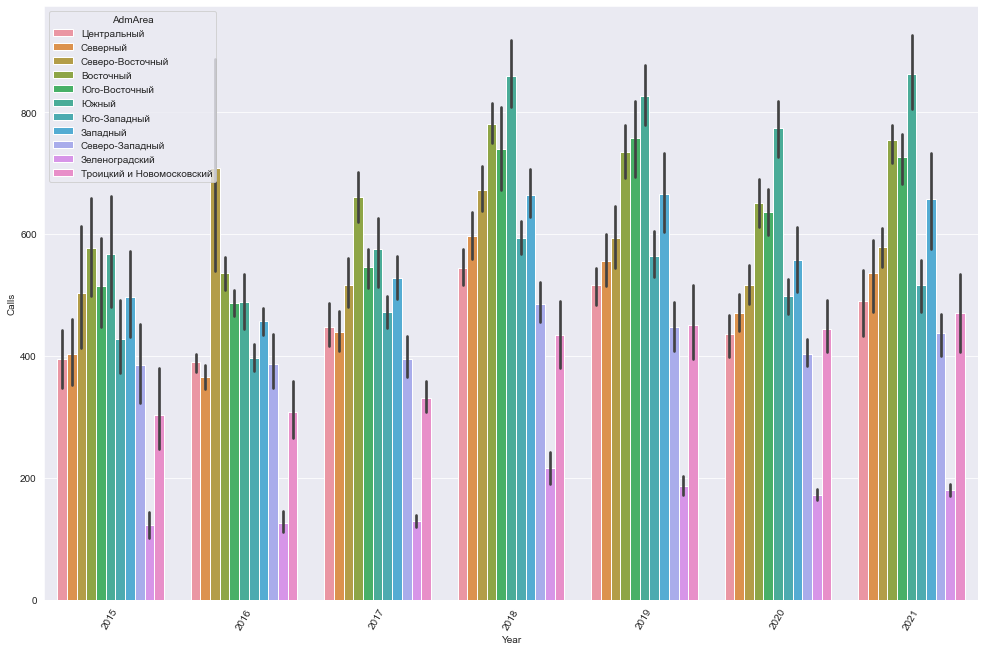

In [30]:
sns.barplot(x = 'Year',y = 'Calls',data=df,hue = 'AdmArea')
plt.tight_layout()
locs, labels = plt.xticks()
plt.setp(labels, rotation=60)

fig=plt.gcf()
fig.set_size_inches(15,10)

Не совсем информативно. В данном случае определенно лучше сделать сводную таблицу

In [31]:
df_pivot = df.pivot_table(values = "Calls",index = 'AdmArea',columns='Year',aggfunc='sum')

In [32]:
df_pivot

Year,2015,2016,2017,2018,2019,2020,2021
AdmArea,,,,,,,
Восточный,6921,6444,7940,9376,8821,7823,3776
Западный,5972,5482,6345,7967,7990,6697,3288
Зеленоградский,1469,1524,1550,2598,2244,2074,901
Северный,4850,4392,5265,7163,6681,5646,2679
Северо-Восточный,6039,8497,6190,8072,7126,6196,2895
Северо-Западный,4628,4652,4746,5830,5373,4843,2188
Троицкий и Новомосковский,3636,3691,3974,5220,5411,5324,2353
Центральный,4738,4682,5377,6529,6204,5226,2453
Юго-Восточный,6179,5838,6555,8879,9087,7637,3631


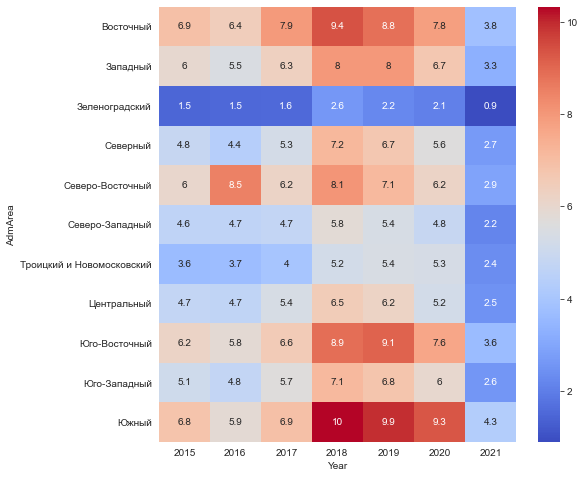

In [33]:
sns.heatmap(df_pivot/1000,annot = True,cmap= 'coolwarm')

fig=plt.gcf()
fig.set_size_inches(8,8)

plt.show()

In [46]:
df_pivot_year = df.pivot_table(values = "Calls",index = 'Month_num',columns='Year',aggfunc='sum')
df_pivot_year.index = df_pivot_year.index.astype(int)
df_pivot_year = df_pivot_year.sort_index()

Теперь сделаем такую же таблицу, но в разрезе месяца

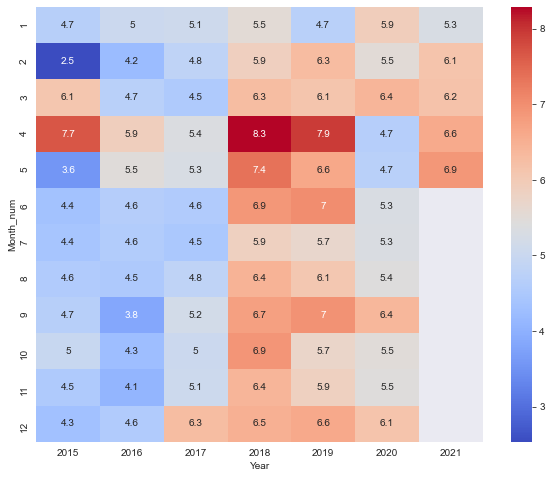

In [55]:
sns.heatmap(df_pivot_year/1000,annot = True,cmap= 'coolwarm')

fig=plt.gcf()
fig.set_size_inches(10,8)

plt.show()

Итак по итогам исследования можно сделать несколько выводов
- Количество вызовов пожарных зависит от месяца, наибольшее количество вызовов приходится на весенний период
- В 2018 году значительно возрасло количество вызовов пожарных во всех районах
- В 2020 по некоторым регионам количество вызовов сократилось. Связано это было предположительно с тем, что люди больше находились дома, и таким образом предотвращали потенциальные пожары.
- В 2021 году значительных отклонений не наблюдается от 2019 года. Хотя Возможно будет увеличение данных значений из за аномальной жаркой погоды
- В южном районе в 2019 г количество вызовов практически не изменилось. Причины необходимо искать за пределами данного датасета